**Definizione problema**
* Griglia di dimensione NxN
* M oggetti posizionati nella griglia
* A partire da una starting position, l'aggente deve raccogliere gli oggetti minimizzando il numero di passi

In [1]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Dimensione della griglia
grid_size = (10, 10)
starting_position = (0, 0)
# Posizioni degli oggetti

objects = [(1, 2), (4, 5), (7, 8), (2, 3)]

# Numero di elementi da raccogliere (predefinito dalle posizioni)
num_elements = len(objects)

# Distanza di Manhattan
def manhattan_distance(pos1, pos2):
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

# Funzione per calcolare la lunghezza del percorso
def evaluate(individual, positions):
    #Individual: permutazione degli indici
    #Positions: posizioni degli oggetti
    
    distance = manhattan_distance(starting_position, positions[individual[0]])
    for i in range(0, len(individual)-1):
        distance += manhattan_distance(positions[individual[i]], positions[individual[i + 1]])
        
    
    return distance,

# Definizione del tipo di problema e fitness
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Registrazione delle funzioni genetiche
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_elements), num_elements) #permutazione casuale degli indici
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Funzioni di crossover e mutazione
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.02)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate, positions=objects)

# Parametri dell'algoritmo genetico
population_size = 10
num_generations = 500
cxpb, mutpb = 0.7, 0.2

# Creazione della popolazione iniziale
population = toolbox.population(n=population_size)

# Algoritmo genetico
algorithms.eaSimple(population, toolbox, cxpb, mutpb, num_generations, 
                    stats=tools.Statistics(lambda ind: ind.fitness.values),
                    halloffame=tools.HallOfFame(1),
                    verbose=False)

# Risultati
best_individual = tools.selBest(population, 1)[0]
best_route = [objects[i] for i in best_individual]
best_distance = evaluate(best_individual, objects)[0]

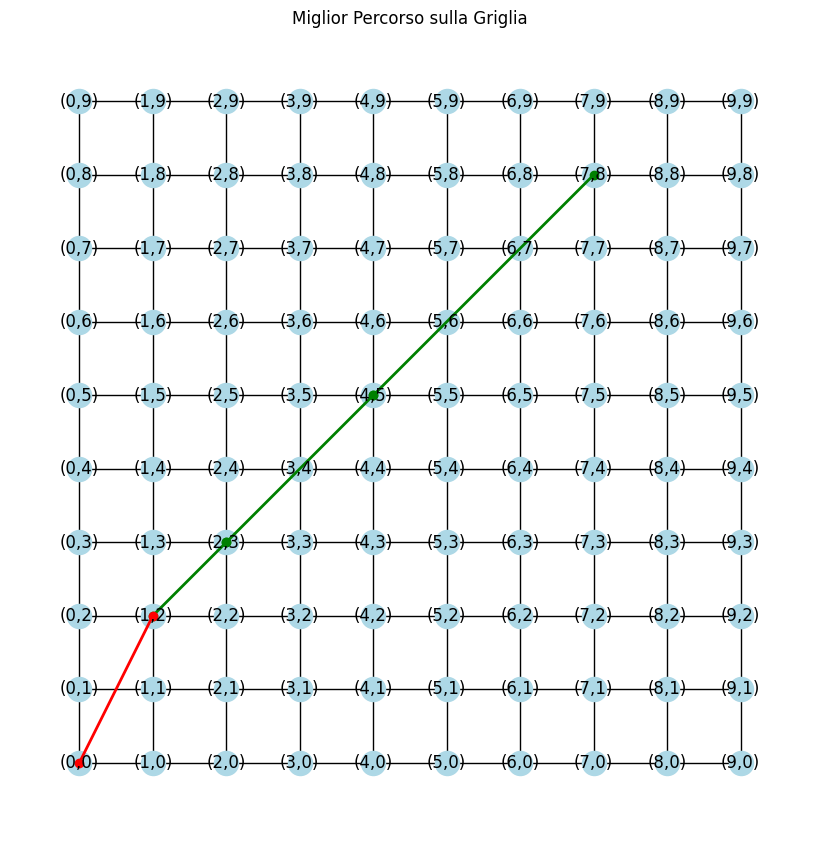

Starting position (0, 0)
Miglior percorso: [(1, 2), (2, 3), (4, 5), (7, 8)]
Distanza del miglior percorso: 15


In [2]:
def plot_grid(grid_size, objects, best_route):
    G = nx.grid_2d_graph(grid_size[0], grid_size[1])
    
    pos = dict((n, n) for n in G.nodes())
    labels = dict(((i, j), f'({i},{j})') for i, j in G.nodes())

    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, node_color='lightblue', with_labels=False, node_size=300)
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Disegnare gli oggetti
    for obj in objects:
        plt.scatter(*obj, color='red', s=200)
    
    # Disegnare la posizione iniziale
    plt.scatter(0, 0, color='red', s=200)
    
    # Disegnare il percorso
    path = best_route
    for i in range(len(path) - 1):
        p1, p2 = path[i], path[i + 1]
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='green', linewidth=2, marker='o', markersize=6)
    
    first_point = path[0]
    plt.plot([starting_position[0], first_point[0]], [starting_position[1], first_point[1]], color='red', linewidth=2, marker='o', markersize=6)
    
    
    plt.title("Miglior Percorso sulla Griglia")
    plt.show()

plot_grid(grid_size, objects, best_route)
print("Starting position", starting_position)
print("Miglior percorso:", best_route)
print("Distanza del miglior percorso:", best_distance)